## FDS (Fraud Detection System, 이상금융거래탐지시스템)

### Module import

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing
import missingno as msno
import tensorflow as tf

from sklearn import metrics, preprocessing
from sklearn.preprocessing import Imputer, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, preprocessing
from sklearn.decomposition import PCA
%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

In [41]:
#!pip install quilt
#!quilt install ResidentMario/missingno_data

In [43]:
#Multiprocessing Load
# files = ['./input/train_identity.csv',
#          './input/train_transaction.csv',
#          './input/test_identity.csv', 
#          './input/test_transaction.csv',
#          './input/sample_submission.csv']
# def load_data(file):
#     return pd.read_csv(file)

# with multiprocessing.Pool() as pool:
#     train_id, train_tr, test_id, test_tr,  sub = pool.map(load_data, files)

* Load CSV file

In [3]:
train_tr = pd.read_csv('./input/train_transaction.csv', index_col='TransactionID')
train_id = pd.read_csv('./input/train_identity.csv', index_col='TransactionID')

# test_tr = pd.read_csv('./input/test_transaction.csv', index_col='TransactionID')
# test_id = pd.read_csv('./input/test_identity.csv', index_col='TransactionID')

* Left join by TransactionId

In [4]:
train = pd.merge(train_tr, train_id,
                        how='left',
                        on='TransactionID')
del train_tr,train_id
# test = pd.merge(test_tr, test_id,
#                         how='left',
#                         on='TransactionID')

In [ ]:
#test.isnull().sum(axis=0)

In [ ]:
corr_with_Fraud = train.corrwith(train['isFraud'])
for d in corr_with_Fraud:
    if(d > 0.01):
        print((corr_with_Fraud==d).argmax(), d)



In [ ]:
corr_with_Fraud = train.corrwith(train_mer['isFraud'])
print(corr_with_Fraud)

In [1]:
msno.matrix(df=train.iloc[:, 61:80], figsize=(2, 2), color=(0.8, 0.5, 0.2))

NameError: name 'msno' is not defined

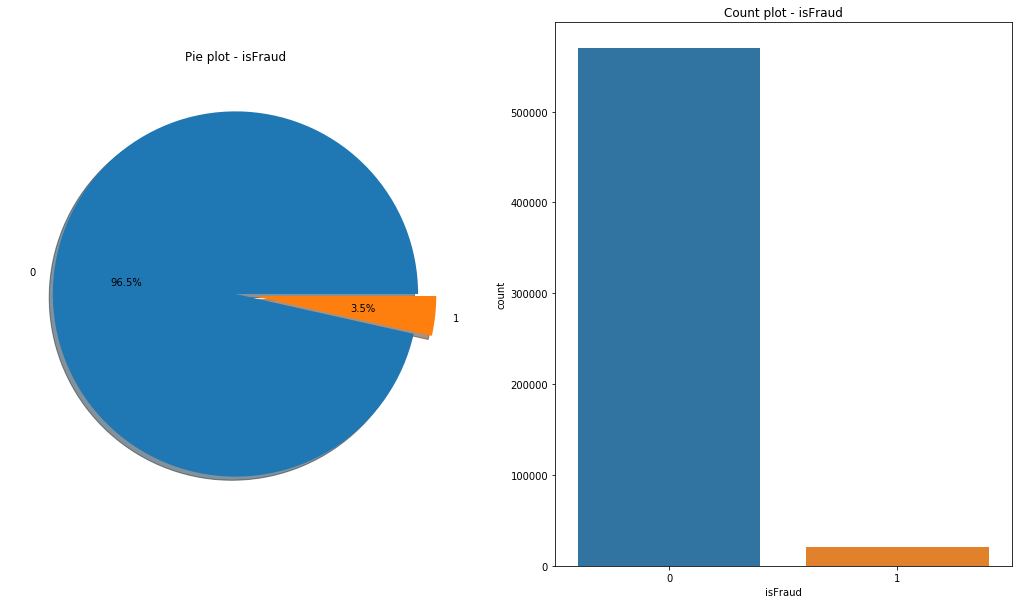

In [50]:
f, ax = plt.subplots(1, 2, figsize=(18, 10))

train['isFraud'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - isFraud')
ax[0].set_ylabel('')
sns.countplot('isFraud', data=train, ax=ax[1])
ax[1].set_title('Count plot - isFraud')

plt.show()

In [19]:
train['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,DeviceInfo_verykoolS5019,DeviceInfo_verykoolS5524,DeviceInfo_verykoolS5525,DeviceInfo_verykoolS5530 Build/LMY47I,DeviceInfo_verykools4009,DeviceInfo_verykools5004,DeviceInfo_verykools5034,DeviceInfo_verykools5035,DeviceInfo_vivo,DeviceInfo_xs-Z47b7VqTMxs
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,...,0,0,0,0,0,0,0,0,0,0
2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,287.0,...,0,0,0,0,0,0,0,0,0,0
2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [30]:
print(train2.columns)

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3',
       'card5', 'addr1', 'addr2', 'dist1',
       ...
       'DeviceInfo_verykoolS5019', 'DeviceInfo_verykoolS5524',
       'DeviceInfo_verykoolS5525', 'DeviceInfo_verykoolS5530 Build/LMY47I',
       'DeviceInfo_verykools4009', 'DeviceInfo_verykools5004',
       'DeviceInfo_verykools5034', 'DeviceInfo_verykools5035',
       'DeviceInfo_vivo', 'DeviceInfo_xs-Z47b7VqTMxs'],
      dtype='object', length=2834)


In [52]:
#train_tr['isFraud'].count()

590540

In [ ]:
#without preprocessing

# del train
# del train_tr
# del train_id

# train = train.drop(columns=['dist2','R_emaildomain','D2','D3','D4','D5',
#                              'D7','D8','D9','D12','D13','D14'
#                             ])
# train = train.drop(columns=['V1','V2'])
train = train.loc[:,['isFraud','TransactionDT','TransactionAmt','ProductCD','card1',
                     'card2','card3','C1','C2','C3','C4',
                     'V12'
                    ]]
#print(train)
train2 = pd.get_dummies(train)
train2=train2.dropna(axis=0)
#train2.isnull().sum(axis=0)

#y= pd.get_dummies(train2.isFraud)
y =train2.isFraud
X = train2.drop(columns=['isFraud'])

#headerX = train2.drop(columns=['isFraud']).columns

In [12]:
X2= np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3,shuffle = False )
print(X2.shape)
print(y.shape)


(505914, 15)
(505914,)


In [ ]:
print(X_train)

In [22]:
print(y_train[:])

2
[0 0 0 ... 0 0 0]


In [17]:
glm = LogisticRegression()
glm.fit(X_train, y_train[:])
y_pred = glm.predict(X_test)
acc = np.mean(y_test[:] == y_pred )
print("SKLEARN Logistic Regression Accuracy = {:3.3f}".format(acc))

SKLEARN Logistic Regression Accuracy = 0.968
